# MNIST - flat (as is)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('train.csv', delimiter=',',skip_header=1)
data.shape

(42000, 785)

In [4]:
# normalize X
X = data[:,1:]/255
# one hot encode y
y = np.zeros(shape=(len(X),10),dtype=int)
y[np.arange(len(data)),data[:,0].astype(int)] = 1

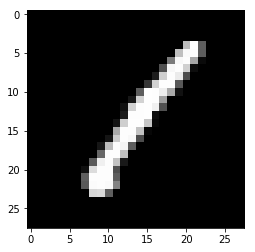

(1, array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]))

In [5]:
# sample image
plt.imshow(X[0].reshape(28,28),cmap='gray')
plt.show()
np.argmax(y[0]),y[0]

In [6]:
# train/test split
mask = np.zeros(shape=len(X),dtype=bool)
mask[np.random.choice(np.arange(len(X)),size=int(0.8*len(X)),replace=False)] = 1
X_train = X[mask]
X_test = X[~mask]
y_train = y[mask]
y_test = y[~mask]

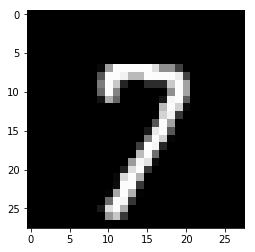

(7, array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]))

In [7]:
# double check split
i = np.random.randint(len(X_test))
plt.imshow(X_test[i].reshape(28,28),cmap='gray')
plt.show()
np.argmax(y_test[i]),y_test[i]

In [8]:
# check balance
np.unique(np.argmax(y_train,axis=1),return_counts=True)[1]

array([3214, 3784, 3362, 3489, 3240, 3037, 3290, 3556, 3303, 3325])

In [9]:
np.unique(np.argmax(y_test,axis=1),return_counts=True)[1]

array([918, 900, 815, 862, 832, 758, 847, 845, 760, 863])

### ANN model

In [10]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout

Using TensorFlow backend.


In [14]:
input_layer = Input(shape=(28*28,))
hidden1 = Dense(512,activation='relu')(input_layer)
drop1 = Dropout(rate=0.5)(hidden1)
hidden2 = Dense(128,activation='relu')(drop1)
drop2 = Dropout(rate=0.5)(hidden2)
output = Dense(10, activation='softmax')(drop2)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

### Training

In [15]:
model.fit(X_train,y_train,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
33600/33600 [==============================] - 11s 334us/step - loss: 0.0746 - acc: 0.9739
Epoch 2/10
33600/33600 [==============================] - 11s 331us/step - loss: 0.0389 - acc: 0.9867
Epoch 3/10
33600/33600 [==============================] - 11s 327us/step - loss: 0.0314 - acc: 0.9895
Epoch 4/10
33600/33600 [==============================] - 11s 326us/step - loss: 0.0274 - acc: 0.9907
Epoch 5/10
33600/33600 [==============================] - 11s 321us/step - loss: 0.0258 - acc: 0.9915
Epoch 6/10
33600/33600 [==============================] - 11s 313us/step - loss: 0.0232 - acc: 0.9923
Epoch 7/10
33600/33600 [==============================] - 11s 320us/step - loss: 0.0205 - acc: 0.9933
Epoch 8/10
33600/33600 [==============================] - 11s 329us/step - loss: 0.0198 - acc: 0.9936
Epoch 9/10
33600/33600 [==============================] - 11s 324us/step - loss: 0.0188 - acc: 0.9939
Epoch 10/10
33600/33600 [=========

### Scoring

In [16]:
model.evaluate(X_train,y_train)

33600/33600 [==============================] - 2s 74us/step


[0.0055057838072739935, 0.9981815431799207]

In [17]:
model.evaluate(X_test,y_test)

8400/8400 [==============================] - 1s 75us/step


[0.01614778828725407, 0.9955833279518854]

### Prepare submission

In [18]:
submit = np.genfromtxt('test.csv', delimiter=',',skip_header=1)

In [19]:
submit.shape

(28000, 784)

In [20]:
# normalize
X_s = submit/255

In [21]:
pred = model.predict(X_s)

In [22]:
pred = np.argmax(pred,axis=1)

In [23]:
pred

array([2, 0, 9, ..., 3, 9, 2])

In [24]:
import pandas as pd

In [26]:
s = pd.read_csv('sample_submission.csv',index_col=0)
s.head()

,Label
ImageId,
1,0
2,0
3,0
4,0
5,0


In [27]:
s['Label'] = pred
s.to_csv('flat_submit.csv')